# EDA, 모델 수정 2

## 0.준비

- 한글 폰트 적용
  - 아래 셀 실행 후 런타임 다시 시작, 런타임 모두 실행

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

- 라이브러리

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


- 데이터 로드

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/구내식당/train.csv')
test = pd.read_csv('/content/drive/MyDrive/구내식당/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/구내식당/sample_submission.csv')

- 데이터 전처리
  - train

In [ ]:
# 석식 이용 인원 0인 날 삭제
train = train[train['석식계'] != 0]

# 요일 숫자로 변경
train.loc[train['요일'] == '월', '요일'] = 1
train.loc[train['요일'] == '화', '요일'] = 2
train.loc[train['요일'] == '수', '요일'] = 3
train.loc[train['요일'] == '목', '요일'] = 4
train.loc[train['요일'] == '금', '요일'] = 5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
train['월'] = train['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
train['일'] = train['일자'].map(day)

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  1   2601      50     150             238          0.0   
1  2016-02-02  2   2601      50     173             319          0.0   
2  2016-02-03  3   2601      56     180             111          0.0   
3  2016-02-04  4   2601     104     220             355          0.0   
4  2016-02-05  5   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  월  일  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2  1  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2  2  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2  3  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2  4  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2  5

- 데이터 전처리
  - test

In [ ]:
# 요일 숫자로 변경
test.loc[test['요일'] == '월', '요일'] = 1
test.loc[test['요일'] == '화', '요일'] = 2
test.loc[test['요일'] == '수', '요일'] = 3
test.loc[test['요일'] == '목', '요일'] = 4
test.loc[test['요일'] == '금', '요일'] = 5

# 월 칼럼 추가
test['월'] = test['일자'].map(month)

# 일 칼럼 추가
test['일'] = test['일자'].map(day)

test.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2021-01-27  3   2983      88     182               5        358.0   
1  2021-01-28  4   2983     104     212             409        348.0   
2  2021-01-29  5   2983     270     249               0        294.0   
3  2021-02-01  1   2924     108     154             538        322.0   
4  2021-02-02  2   2924      62     186             455        314.0   

                                                조식메뉴  \
0  모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1  모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2  모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3  모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   
2  쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...   
3  쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...   
4  쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...   

                                            석식메뉴  월   일  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   1  27  
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지   1  28  
2            흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치   1  29  
3           흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치   2   1  
4       흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치   2   2

## 1.EDA

### 1) feature를 주인공으로

- 본사정원수는 지속적으로 우상향
- 휴가자수는 연휴 전후로 급등
- 출장자수는 특이 패턴 없음
- 시간외근무승인건수, 야근하는 사람 수 특이 패턴 있음
- 재택근무자수 특정일 기준 발생

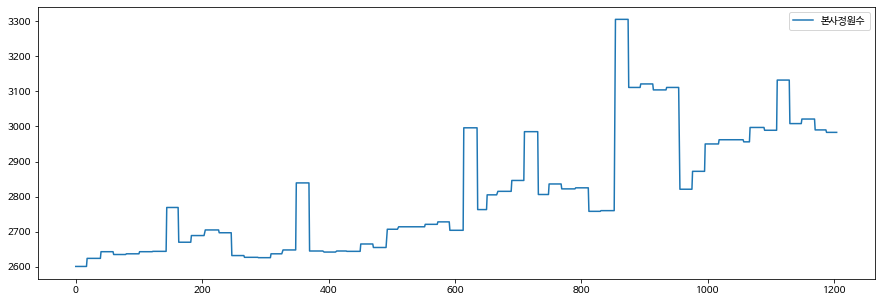

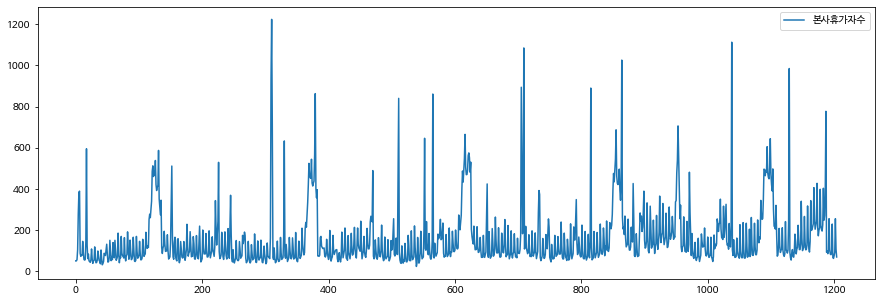

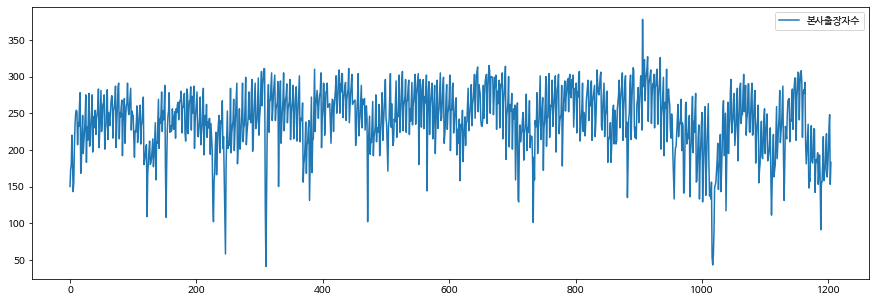

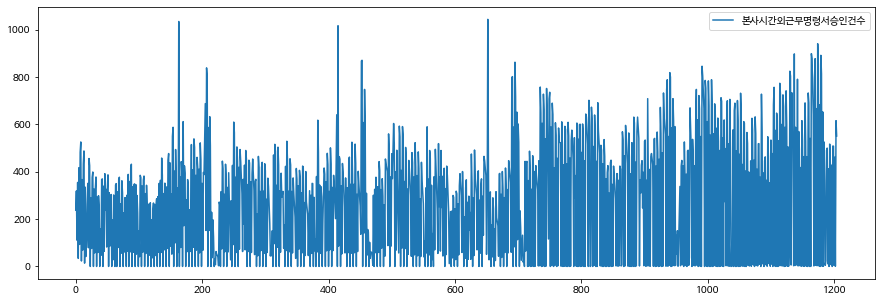

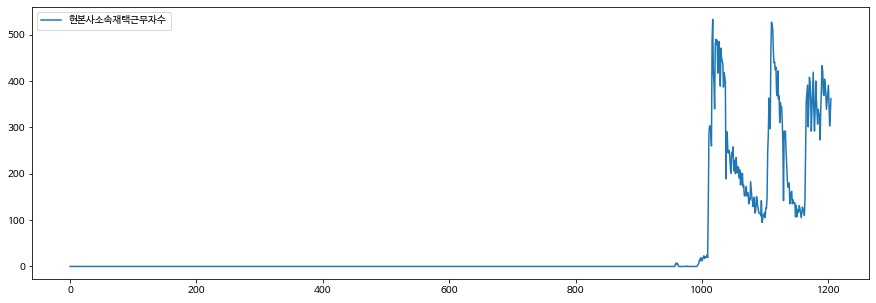

In [ ]:
train[['본사정원수']].plot(figsize=(15,5))
plt.show()

train[['본사휴가자수']].plot(figsize=(15,5))
plt.show()

train[['본사출장자수']].plot(figsize=(15,5))
plt.show()

train[['본사시간외근무명령서승인건수']].plot(figsize=(15,5))
plt.show()

train[['현본사소속재택근무자수']].plot(figsize=(15,5))
plt.show()

#### a) 재택근무 발생 원인

- 코로나의 영향

In [ ]:
train[train['현본사소속재택근무자수'] > 100]

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
1010  2020-03-20  5   2950     176     263               3        135.0   
1011  2020-03-23  1   2950     109     178             687        285.0   
1012  2020-03-24  2   2950     131     137             639        303.0   
1013  2020-03-25  3   2950     122     146               1        303.0   
1014  2020-03-26  4   2950     133     133             584        288.0   
...          ... ..    ...     ...     ...             ...          ...   
1200  2021-01-20  3   2983      75     198               4        391.0   
1201  2021-01-21  4   2983      92     231             462        351.0   
1202  2021-01-22  5   2983     255     248               1        303.0   
1203  2021-01-25  1   2983     107     153             616        327.0   
1204  2021-01-26  2   2983      69     183             551        362.0   

                                                   조식메뉴  \
1010  모닝롤/허니브레드  우유/주스 계란후라이 야채죽/쌀밥 (쌀:국내산) 꽃게탕 (오징어...   
1011  모닝롤/베이글  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 감자국  꽈리고추...   
1012  모닝롤/햄치즈샌드  우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 쑥국  수제어묵볶...   
1013  모닝롤/고구마파이  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 피홍합탕  감...   
1014  모닝롤/바나나샌드  우유/주스 계란후라이 새송이죽/쌀밥 (쌀:국내산) 버섯매운탕 (...   
...                                                 ...   
1200  모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...   
1201  모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...   
1202  모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...   
1203  모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...   
1204  모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...   

                                                   중식메뉴  \
1010  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 갈비탕 (갈비:호주산) 칠리새우  감자채볶음 ...   
1011  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국  오리양념불고기*쌈무 (오리:국내산)...   
1012  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...   
1013  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국  목살스테이크 (목살:국내산) 파...   
1014  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국  제육볶음 (돈육:국내산) 계란찜 ...   
...                                                 ...   
1200  쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...   
1201  쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...   
1202  전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...   
1203  쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...   
1204  쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...   

                                                   석식메뉴     중식계    석식계  월   일  
1010  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 건새우아욱국  치즈함박스테이크 (돈육:국내,수...   627.0  358.0  3  20  
1011  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼  한식...  1110.0  651.0  3  23  
1012  오므라이스 (쌀:국내산) 가쯔오장국  돈육고구마강정 (돈육:국내산) 과일플레인샐러드...  1083.0  754.0  3  24  
1013             찹쌀밥  장각닭죽  생야채*쌈짱  오렌지  하루야채주스  포기김치    1022.0  526.0  3  25  
1014  멸치주먹밥 (쌀,현미흑미:국내산) 우동  해물까스*와사비소스  꽃맛살샐러드  무피클...   955.0  645.0  3  26  
...                                                 ...     ...    ... ..  ..  
1200     김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치   1093.0  421.0  1  20  
1201            흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치    832.0  353.0  1  21  
1202        흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치    579.0  217.0  1  22  
1203            흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치   1145.0  502.0  1  25  
1204         (New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기   1015.0  480.0  1  26  

[193 rows x 14 columns]

#### b) 본사 시간 외 근무 이상치 발생 원인

- 수요일과 금요일에 일종의 야근 없는 날 존재

In [ ]:
train[train['본사시간외근무명령서승인건수'] == 0]['요일'].value_counts()

3    148
5     34
Name: 요일, dtype: int64

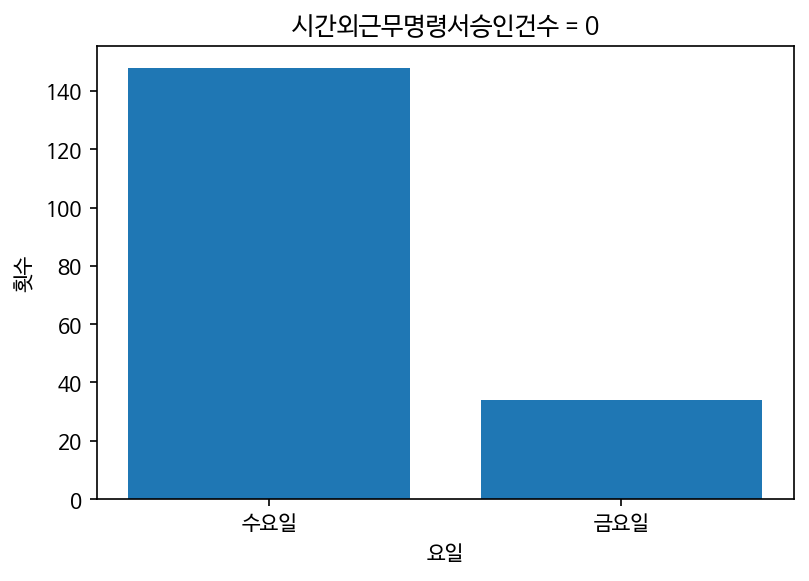

In [ ]:
x = ['수요일', '금요일']
y = train[train['본사시간외근무명령서승인건수'] == 0].value_counts('요일').values

plt.figure(dpi=150)

plt.title("시간외근무명령서승인건수 = 0")
plt.xlabel('요일')
plt.ylabel('횟수')

plt.bar(x, y)
plt.show()

### 2) feature와 target의 상관관계

#### a) 중식계와 feature의 상관관계

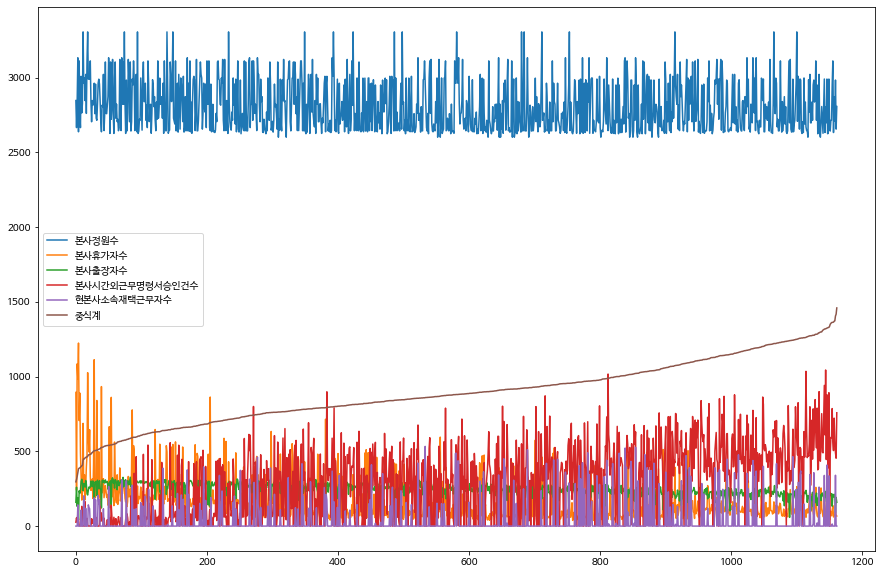

In [ ]:
train.sort_values(by='중식계')[['본사정원수',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

- 출장자수

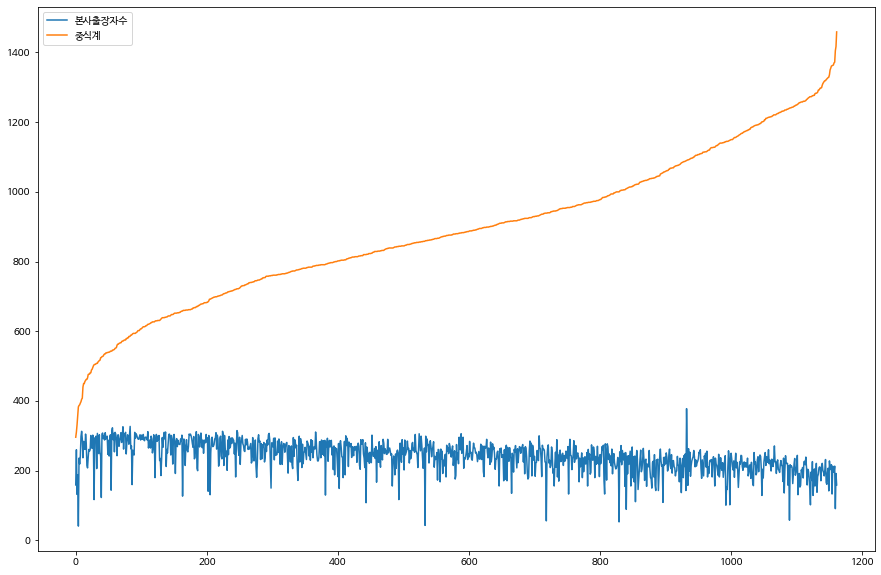

In [ ]:
train.sort_values(by='중식계')[['본사출장자수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

- 휴가자수

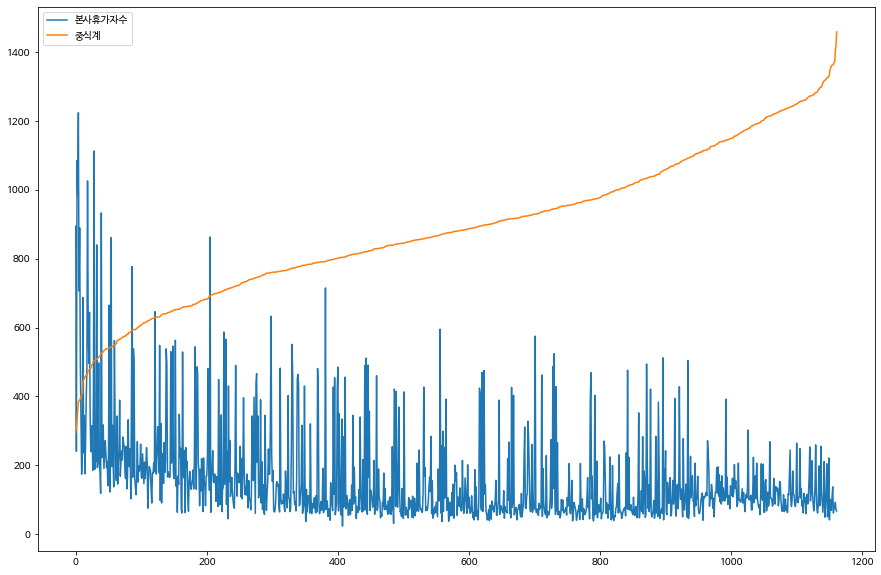

In [ ]:
train.sort_values(by='중식계')[['본사휴가자수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

- 현재원

  본사정원수 - 휴가자수 - 출장자수

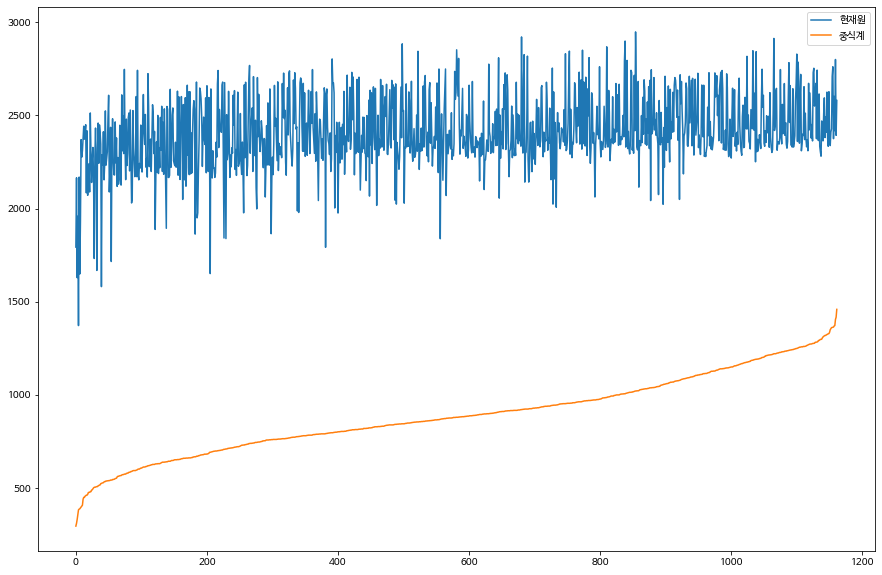

In [ ]:
train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수']
train.sort_values(by='중식계')[['현재원', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

#### b) 석식계와 feature의 상관관계

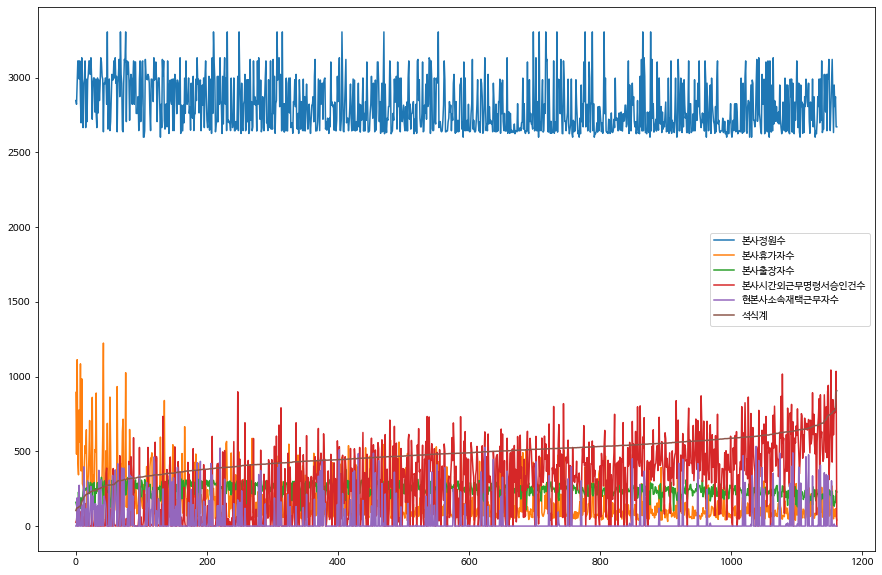

In [ ]:
train.sort_values(by='석식계')[['본사정원수',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수', '석식계'	]].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

- 시간외근무

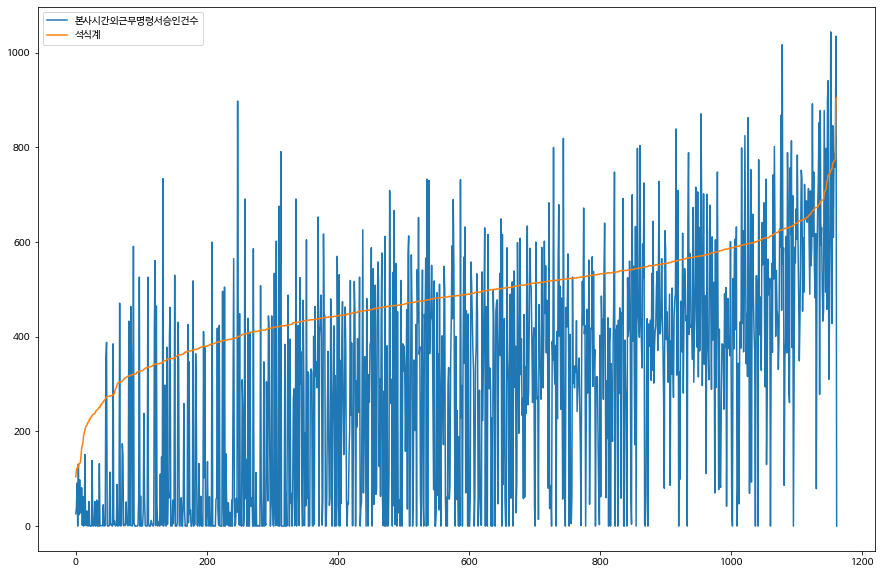

In [ ]:
train.sort_values(by='석식계')[['본사시간외근무명령서승인건수', '석식계']].reset_index(drop=True).plot(figsize=(15,10))

#### c) 중식계와 석식계의 상관관계

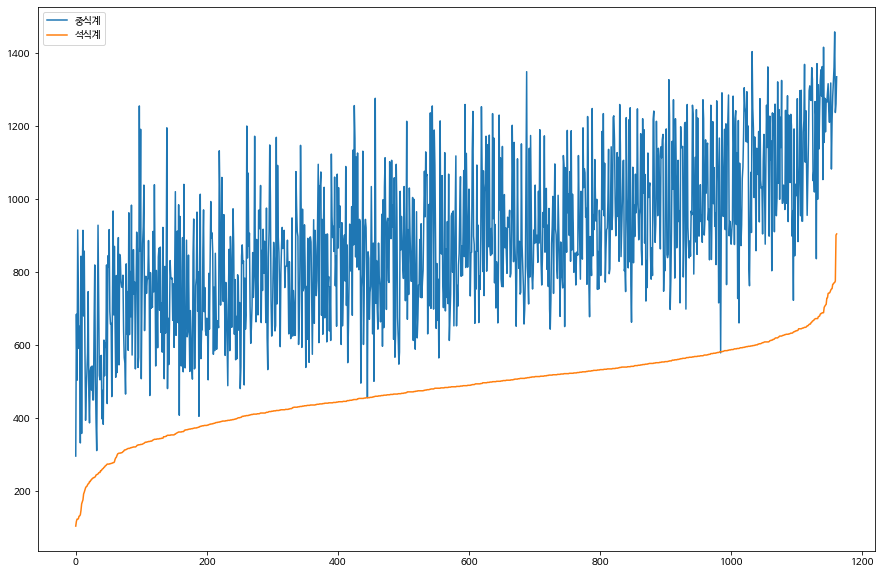

In [ ]:
train.sort_values(by='석식계')[['중식계', '석식계']].reset_index(drop=True).plot(figsize=(15,10))

### 3) EDA, 인사이트 정리
PPT

## 2.EDA를 통해 도출한 인사이트

- 본사정원수는 Target과 관계가 없다.

- 본사정원수는 현재원으로 활용 가능하다.

- 중식계는 휴가자수와 출장자수와 관계가 있다.

- 석식계는 시간외근무자수와 관계가 있다.

- 중식계와 석식계는 상관관계가 있다.

### 1) 본사정원수는 target과 관계가 없다

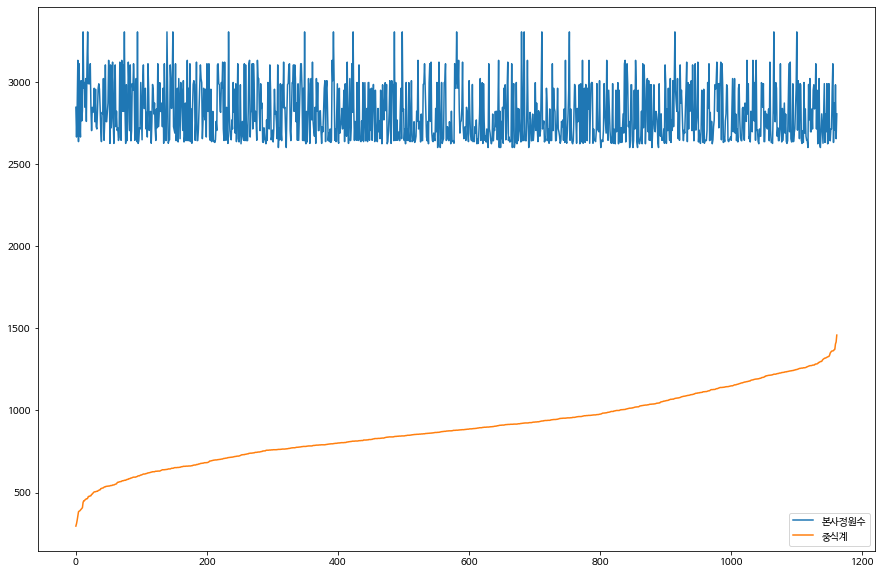

In [ ]:
train.sort_values(by='중식계')[['본사정원수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

### 2) 본사정원수는 현재원으로 활용 가능

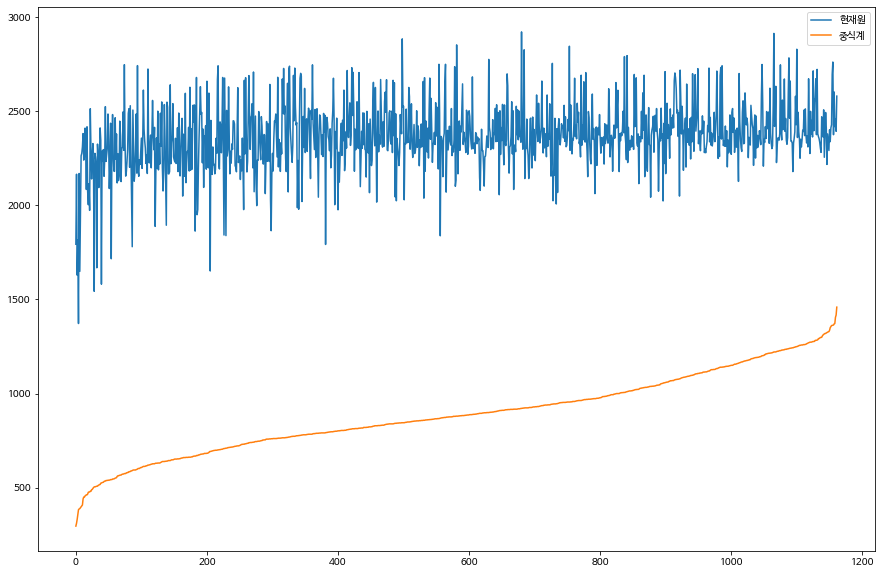

In [ ]:
train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']
train.sort_values(by='중식계')[['현재원', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

### 3) 중식계와 석식계는 상관관계가 있다

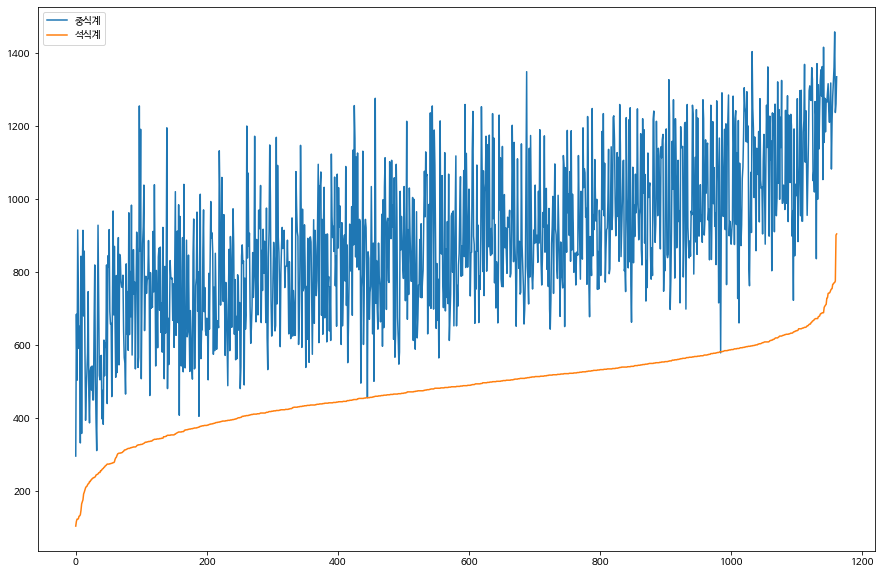

In [ ]:
train.sort_values(by='석식계')[['중식계', '석식계']].reset_index(drop=True).plot(figsize=(15,10))

## 3.인사이트를 바탕으로 모델 수정

In [ ]:
train

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0     2016-02-01  1   2601      50     150             238          0.0   
1     2016-02-02  2   2601      50     173             319          0.0   
2     2016-02-03  3   2601      56     180             111          0.0   
3     2016-02-04  4   2601     104     220             355          0.0   
4     2016-02-05  5   2601     278     181              34          0.0   
...          ... ..    ...     ...     ...             ...          ...   
1200  2021-01-20  3   2983      75     198               4        391.0   
1201  2021-01-21  4   2983      92     231             462        351.0   
1202  2021-01-22  5   2983     255     248               1        303.0   
1203  2021-01-25  1   2983     107     153             616        327.0   
1204  2021-01-26  2   2983      69     183             551        362.0   

                                                   조식메뉴  \
0     모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1     모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2     모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3     모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4     모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   
...                                                 ...   
1200  모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...   
1201  모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...   
1202  모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...   
1203  모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...   
1204  모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...   

                                                   중식메뉴  \
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2     카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   
...                                                 ...   
1200  쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...   
1201  쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...   
1202  전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...   
1203  쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...   
1204  쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...   

                                                   석식메뉴     중식계    석식계  월   일  \
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2   1   
1     콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2   2   
2     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2   3   
3     미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2   4   
4     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2   5   
...                                                 ...     ...    ... ..  ..   
1200     김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치   1093.0  421.0  1  20   
1201            흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치    832.0  353.0  1  21   
1202        흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치    579.0  217.0  1  22   
1203            흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치   1145.0  502.0  1  25   
1204         (New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기   1015.0  480.0  1  26   

         현재원  
0     2401.0  
1     2378.0  
2     2365.0  
3     2277.0  
4     2142.0  
...      ...  
1200  2319.0  
1201  2309.0  
1202  2177.0  
1203  2396.0  
1204  2369.0  

[1162 rows x 15 columns]

In [ ]:
features = ['요일', '월', '일', '현재원',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']
train[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수
0     1  2   1  2401.0      50     150             238          0.0
1     2  2   2  2378.0      50     173             319          0.0
2     3  2   3  2365.0      56     180             111          0.0
3     4  2   4  2277.0     104     220             355          0.0
4     5  2   5  2142.0     278     181              34          0.0
...  .. ..  ..     ...     ...     ...             ...          ...
1200  3  1  20  2319.0      75     198               4        391.0
1201  4  1  21  2309.0      92     231             462        351.0
1202  5  1  22  2177.0     255     248               1        303.0
1203  1  1  25  2396.0     107     153             616        327.0
1204  2  1  26  2369.0      69     183             551        362.0

[1162 rows x 8 columns]

In [ ]:
# test에는 현재원 없음
test

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0   2021-01-27  3   2983      88     182               5        358.0   
1   2021-01-28  4   2983     104     212             409        348.0   
2   2021-01-29  5   2983     270     249               0        294.0   
3   2021-02-01  1   2924     108     154             538        322.0   
4   2021-02-02  2   2924      62     186             455        314.0   
5   2021-02-03  3   2924      59     199               5        286.0   
6   2021-02-04  4   2924      61     211             476        288.0   
7   2021-02-05  5   2924     169     252               0        256.0   
8   2021-02-08  1   2924      88     174             690        329.0   
9   2021-02-09  2   2924      94     183             542        329.0   
10  2021-02-10  3   2924     489     134               0        233.0   
11  2021-02-15  1   2924     178     131             795        355.0   
12  2021-02-16  2   2924      70     175             815        413.0   
13  2021-02-17  3   2924      77     181               3        379.0   
14  2021-02-18  4   2924      83     247             594        338.0   
15  2021-02-19  5   2924     176     268               1        280.0   
16  2021-02-22  1   2924     105     197             814        247.0   
17  2021-02-23  2   2924      75     200             783        233.0   
18  2021-02-24  3   2924      77     235               3        234.0   
19  2021-02-25  4   2924      91     252             585        235.0   
20  2021-02-26  5   2924     261     279               1        179.0   
21  2021-03-02  2   2975     139     166             781        248.0   
22  2021-03-03  3   2975      50     195               1        292.0   
23  2021-03-04  4   2975      72     236             746        263.0   
24  2021-03-05  5   2975     158     257               2        226.0   
25  2021-03-08  1   2975      97     170             939        264.0   
26  2021-03-09  2   2975      76     170            1003        282.0   
27  2021-03-10  3   2975      71     185               1        271.0   
28  2021-03-11  4   2975      93     223             609        261.0   
29  2021-03-12  5   2975     241     240               0        251.0   
30  2021-03-15  1   2975     126     148             864        314.0   
31  2021-03-16  2   2975      74     176             658        401.0   
32  2021-03-17  3   2975      90     192               4        371.0   
33  2021-03-18  4   2975     106     231             520        351.0   
34  2021-03-19  5   2975     253     255               0        266.0   
35  2021-03-22  1   2975     133     166             707        350.0   
36  2021-03-23  2   2975      82     205             688        349.0   
37  2021-03-24  3   2975      87     234               0        314.0   
38  2021-03-25  4   2975     118     260             441        297.0   
39  2021-03-26  5   2975     311     266               0        229.0   
40  2021-03-29  1   2975     121     178             660        318.0   
41  2021-03-30  2   2975      83     198             625        313.0   
42  2021-03-31  3   2975      86     217               0        317.0   
43  2021-04-01  4   2973      88     256             394        303.0   
44  2021-04-02  5   2973     275     272               0        224.0   
45  2021-04-05  1   2973     125     174             704        331.0   
46  2021-04-06  2   2973      76     170             636        364.0   
47  2021-04-07  3   2973      96     214               1        334.0   
48  2021-04-08  4   2973     105     238             509        324.0   
49  2021-04-09  5   2973     259     268               0        229.0   

                                                 조식메뉴  \
0   모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1   모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2   모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3   모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  

In [ ]:
test['현재원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']
test[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수
0   3  1  27  2355.0      88     182               5        358.0
1   4  1  28  2319.0     104     212             409        348.0
2   5  1  29  2170.0     270     249               0        294.0
3   1  2   1  2340.0     108     154             538        322.0
4   2  2   2  2362.0      62     186             455        314.0
5   3  2   3  2380.0      59     199               5        286.0
6   4  2   4  2364.0      61     211             476        288.0
7   5  2   5  2247.0     169     252               0        256.0
8   1  2   8  2333.0      88     174             690        329.0
9   2  2   9  2318.0      94     183             542        329.0
10  3  2  10  2068.0     489     134               0        233.0
11  1  2  15  2260.0     178     131             795        355.0
12  2  2  16  2266.0      70     175             815        413.0
13  3  2  17  2287.0      77     181               3        379.0
14  4  2  18  2256.0      83     247             594        338.0
15  5  2  19  2200.0     176     268               1        280.0
16  1  2  22  2375.0     105     197             814        247.0
17  2  2  23  2416.0      75     200             783        233.0
18  3  2  24  2378.0      77     235               3        234.0
19  4  2  25  2346.0      91     252             585        235.0
20  5  2  26  2205.0     261     279               1        179.0
21  2  3   2  2422.0     139     166             781        248.0
22  3  3   3  2438.0      50     195               1        292.0
23  4  3   4  2404.0      72     236             746        263.0
24  5  3   5  2334.0     158     257               2        226.0
25  1  3   8  2444.0      97     170             939        264.0
26  2  3   9  2447.0      76     170            1003        282.0
27  3  3  10  2448.0      71     185               1        271.0
28  4  3  11  2398.0      93     223             609        261.0
29  5  3  12  2243.0     241     240               0        251.0
30  1  3  15  2387.0     126     148             864        314.0
31  2  3  16  2324.0      74     176             658        401.0
32  3  3  17  2322.0      90     192               4        371.0
33  4  3  18  2287.0     106     231             520        351.0
34  5  3  19  2201.0     253     255               0        266.0
35  1  3  22  2326.0     133     166             707        350.0
36  2  3  23  2339.0      82     205             688        349.0
37  3  3  24  2340.0      87     234               0        314.0
38  4  3  25  2300.0     118     260             441        297.0
39  5  3  26  2169.0     311     266               0        229.0
40  1  3  29  2358.0     121     178             660        318.0
41  2  3  30  2381.0      83     198             625        313.0
42  3  3  31  2355.0      86     217               0        317.0
43  4  4   1  2326.0      88     256             394        303.0
44  5  4   2  2202.0     275     272               0        224.0
45  1  4   5  2343.0     125     174             704        331.0
46  2  4   6  2363.0      76     170             636        364.0
47  3  4   7  2329.0      96     214               1        334.0
48  4  4   8  2306.0     105     238             509        324.0
49  5  4   9  2217.0     259     268               0        229.0

### 1) 중식계 예측 모델

In [ ]:
X = train[features]
y = train['중식계']

from sklearn.tree import DecisionTreeRegressor
lunch_model = DecisionTreeRegressor()

lunch_model.fit(X, y)

lunch_count_predict = lunch_model.predict(test[features])

### 2) 석식계 예측 모델

In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
features.append('중식계')
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

In [ ]:
# test에는 중식계가 없어서 에러가 남

X = train[features]
y = train['석식계']

from sklearn.tree import DecisionTreeRegressor
dinner_model = DecisionTreeRegressor()

dinner_model.fit(X, y)

dinner_count_predict = dinner_model.predict(test[features])

In [ ]:
test['중식계'] = lunch_count_predict
test[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계
0   3  1  27  2355.0      88     182               5        358.0  1093.0
1   4  1  28  2319.0     104     212             409        348.0   963.0
2   5  1  29  2170.0     270     249               0        294.0   394.0
3   1  2   1  2340.0     108     154             538        322.0  1257.0
4   2  2   2  2362.0      62     186             455        314.0   867.0
5   3  2   3  2380.0      59     199               5        286.0   949.0
6   4  2   4  2364.0      61     211             476        288.0  1005.0
7   5  2   5  2247.0     169     252               0        256.0   661.0
8   1  2   8  2333.0      88     174             690        329.0  1364.0
9   2  2   9  2318.0      94     183             542        329.0  1128.0
10  3  2  10  2068.0     489     134               0        233.0  1022.0
11  1  2  15  2260.0     178     131             795        355.0  1329.0
12  2  2  16  2266.0      70     175             815        413.0  1202.0
13  3  2  17  2287.0      77     181               3        379.0  1093.0
14  4  2  18  2256.0      83     247             594        338.0   959.0
15  5  2  19  2200.0     176     268               1        280.0   766.0
16  1  2  22  2375.0     105     197             814        247.0  1142.0
17  2  2  23  2416.0      75     200             783        233.0  1074.0
18  3  2  24  2378.0      77     235               3        234.0   831.0
19  4  2  25  2346.0      91     252             585        235.0   740.0
20  5  2  26  2205.0     261     279               1        179.0   766.0
21  2  3   2  2422.0     139     166             781        248.0  1074.0
22  3  3   3  2438.0      50     195               1        292.0   949.0
23  4  3   4  2404.0      72     236             746        263.0   804.0
24  5  3   5  2334.0     158     257               2        226.0   620.0
25  1  3   8  2444.0      97     170             939        264.0  1186.0
26  2  3   9  2447.0      76     170            1003        282.0  1324.0
27  3  3  10  2448.0      71     185               1        271.0   967.0
28  4  3  11  2398.0      93     223             609        261.0   858.0
29  5  3  12  2243.0     241     240               0        251.0   929.0
30  1  3  15  2387.0     126     148             864        314.0  1145.0
31  2  3  16  2324.0      74     176             658        401.0   913.0
32  3  3  17  2322.0      90     192               4        371.0  1093.0
33  4  3  18  2287.0     106     231             520        351.0   969.0
34  5  3  19  2201.0     253     255               0        266.0   757.0
35  1  3  22  2326.0     133     166             707        350.0  1257.0
36  2  3  23  2339.0      82     205             688        349.0   831.0
37  3  3  24  2340.0      87     234               0        314.0   958.0
38  4  3  25  2300.0     118     260             441        297.0   971.0
39  5  3  26  2169.0     311     266               0        229.0   477.0
40  1  3  29  2358.0     121     178             660        318.0  1110.0
41  2  3  30  2381.0      83     198             625        313.0  1083.0
42  3  3  31  2355.0      86     217               0        317.0   958.0
43  4  4   1  2326.0      88     256             394        303.0   765.0
44  5  4   2  2202.0     275     272               0        224.0   459.0
45  1  4   5  2343.0     125     174             704        331.0  1257.0
46  2  4   6  2363.0      76     170             636        364.0   761.0
47  3  4   7  2329.0      96     214               1        334.0  1235.0
48  4  4   8  2306.0     105     238             509        324.0   739.0
49  5  4   9  2217.0     259     268               0        229.0   757.0

In [ ]:
# test에는 중식계가 없어서 에러가 남

X = train[features]
y = train['석식계']

from sklearn.tree import DecisionTreeRegressor
dinner_model = DecisionTreeRegressor()

dinner_model.fit(X, y)

dinner_count_predict = dinner_model.predict(test[features])

### 3) 제출

In [ ]:
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission

일자     중식계    석식계
0   2021-01-27  1093.0  421.0
1   2021-01-28   963.0  469.0
2   2021-01-29   394.0  259.0
3   2021-02-01  1257.0  649.0
4   2021-02-02   867.0  502.0
5   2021-02-03   949.0  484.0
6   2021-02-04  1005.0  647.0
7   2021-02-05   661.0  341.0
8   2021-02-08  1364.0  771.0
9   2021-02-09  1128.0  554.0
10  2021-02-10  1022.0  308.0
11  2021-02-15  1329.0  666.0
12  2021-02-16  1202.0  595.0
13  2021-02-17  1093.0  421.0
14  2021-02-18   959.0  620.0
15  2021-02-19   766.0  341.0
16  2021-02-22  1142.0  704.0
17  2021-02-23  1074.0  653.0
18  2021-02-24   831.0  403.0
19  2021-02-25   740.0  424.0
20  2021-02-26   766.0  220.0
21  2021-03-02  1074.0  653.0
22  2021-03-03   949.0  484.0
23  2021-03-04   804.0  424.0
24  2021-03-05   620.0  371.0
25  2021-03-08  1186.0  597.0
26  2021-03-09  1324.0  751.0
27  2021-03-10   967.0  427.0
28  2021-03-11   858.0  502.0
29  2021-03-12   929.0  303.0
30  2021-03-15  1145.0  625.0
31  2021-03-16   913.0  520.0
32  2021-03-17  1093.0  421.0
33  2021-03-18   969.0  609.0
34  2021-03-19   757.0  220.0
35  2021-03-22  1257.0  649.0
36  2021-03-23   831.0  502.0
37  2021-03-24   958.0  537.0
38  2021-03-25   971.0  559.0
39  2021-03-26   477.0  235.0
40  2021-03-29  1110.0  754.0
41  2021-03-30  1083.0  754.0
42  2021-03-31   958.0  498.0
43  2021-04-01   765.0  353.0
44  2021-04-02   459.0  276.0
45  2021-04-05  1257.0  649.0
46  2021-04-06   761.0  421.0
47  2021-04-07  1235.0  421.0
48  2021-04-08   739.0  424.0
49  2021-04-09   757.0  220.0

In [ ]:
submission.to_csv('submission.csv', index=False)

### 4) 결과

ppt

## 4.변수중요도를 이용한 가설검정

### 1) 중식계 변수중요도

In [ ]:
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

In [ ]:
features = features[:-1]
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
lunch_model.feature_importances_

array([0.58973115, 0.03767295, 0.02537603, 0.03992832, 0.15626601,
       0.07709217, 0.06354387, 0.0103895 ])

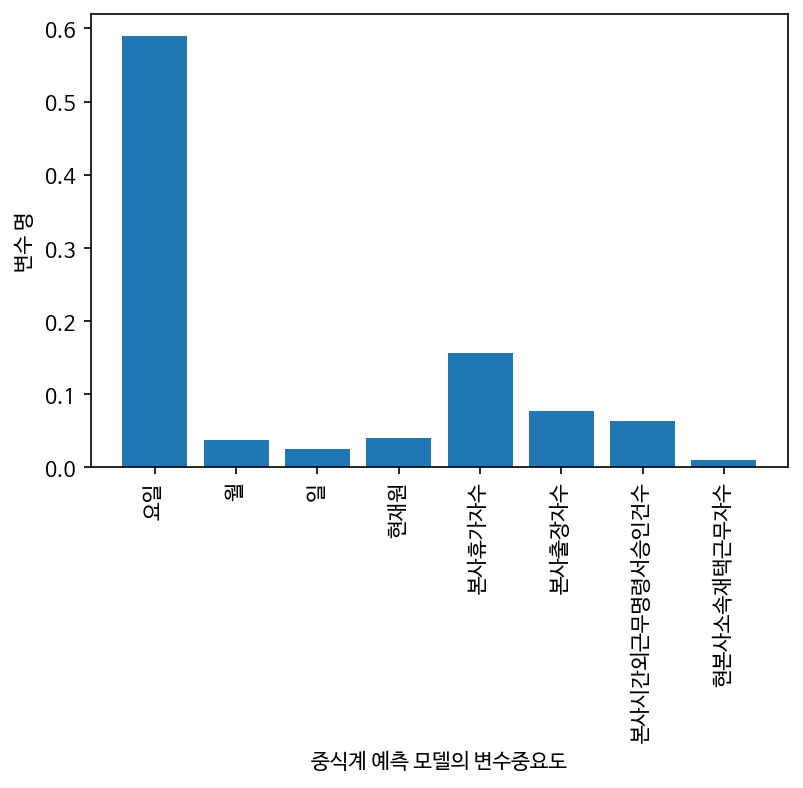

In [ ]:
x = train[features].columns
y = lunch_model.feature_importances_

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.xlabel('중식계 예측 모델의 변수중요도')
plt.ylabel('변수 명')

plt.bar(x,y)
plt.show()

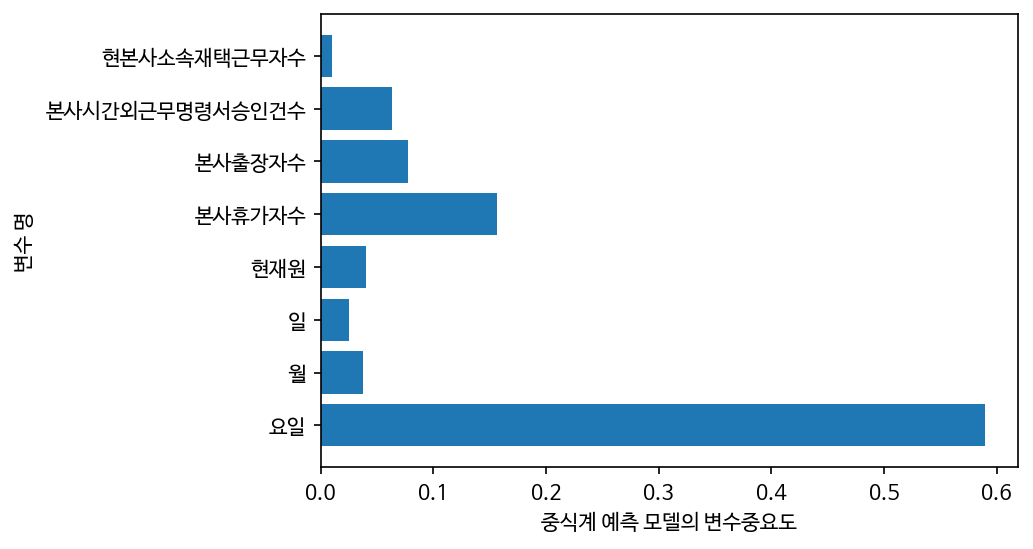

In [ ]:
x = train[features].columns
y = lunch_model.feature_importances_

plt.figure(dpi=150)
# plt.xticks(rotation=90)

plt.xlabel('중식계 예측 모델의 변수중요도')
plt.ylabel('변수 명')

plt.barh(x,y)
plt.show()

### 2) 석식계 변수중요도

In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
features.append('중식계')
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

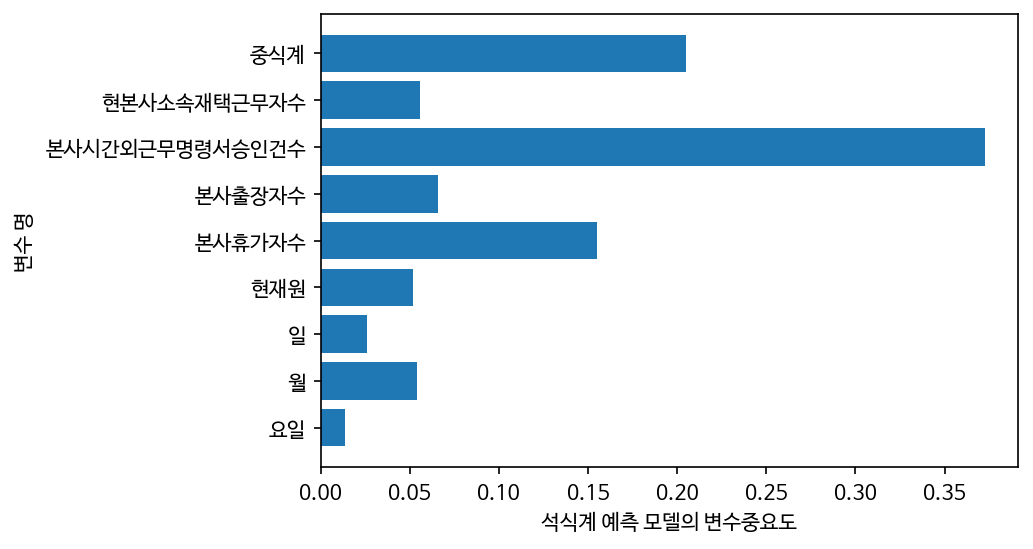

In [ ]:
x = train[features].columns
y = dinner_model.feature_importances_

plt.figure(dpi=150)
# plt.xticks(rotation=90)

plt.xlabel('석식계 예측 모델의 변수중요도')
plt.ylabel('변수 명')

plt.barh(x,y)
plt.show()

# 모델 선택, 모델 튜닝

PPT

더 나은 성능? 

## 1.데이터 다시 로드, 전처리

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/구내식당/train.csv')
test = pd.read_csv('/content/drive/MyDrive/구내식당/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/구내식당/sample_submission.csv')

In [ ]:
# 석식 이용 인원 0인 날 삭제
train = train[train['석식계'] != 0]

# 요일 숫자로 변경
train.loc[train['요일'] == '월', '요일'] = 1
train.loc[train['요일'] == '화', '요일'] = 2
train.loc[train['요일'] == '수', '요일'] = 3
train.loc[train['요일'] == '목', '요일'] = 4
train.loc[train['요일'] == '금', '요일'] = 5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
train['월'] = train['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
train['일'] = train['일자'].map(day)

# 현재원 칼럼 추가
train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  1   2601      50     150             238          0.0   
1  2016-02-02  2   2601      50     173             319          0.0   
2  2016-02-03  3   2601      56     180             111          0.0   
3  2016-02-04  4   2601     104     220             355          0.0   
4  2016-02-05  5   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  월  일  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  2  1   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  2  2   
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  2  3   
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  2  4   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  2  5   

      현재원  
0  2401.0  
1  2378.0  
2  2365.0  
3  2277.0  
4  2142.0

In [ ]:
# 요일 숫자로 변경
test.loc[test['요일'] == '월', '요일'] = 1
test.loc[test['요일'] == '화', '요일'] = 2
test.loc[test['요일'] == '수', '요일'] = 3
test.loc[test['요일'] == '목', '요일'] = 4
test.loc[test['요일'] == '금', '요일'] = 5

# 월 칼럼 추가
def month(text:str):
  return int(text[5:7])
test['월'] = test['일자'].map(month)

# 일 칼럼 추가
def day(text:str):
  return int(text[-2:])
test['일'] = test['일자'].map(day)

# 현재원 칼럼 추가
test['현재원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

test.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2021-01-27  3   2983      88     182               5        358.0   
1  2021-01-28  4   2983     104     212             409        348.0   
2  2021-01-29  5   2983     270     249               0        294.0   
3  2021-02-01  1   2924     108     154             538        322.0   
4  2021-02-02  2   2924      62     186             455        314.0   

                                                조식메뉴  \
0  모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1  모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2  모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3  모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   
2  쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...   
3  쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...   
4  쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...   

                                            석식메뉴  월   일     현재원  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   1  27  2355.0  
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지   1  28  2319.0  
2            흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치   1  29  2170.0  
3           흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치   2   1  2340.0  
4       흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치   2   2  2362.0

## 2.의사결정나무

- 시간 없으면 패스하기

### 1) 중식계 예측 모델

In [ ]:
features = ['요일', '월', '일', '현재원',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']
train[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수
0     1  2   1  2401.0      50     150             238          0.0
1     2  2   2  2378.0      50     173             319          0.0
2     3  2   3  2365.0      56     180             111          0.0
3     4  2   4  2277.0     104     220             355          0.0
4     5  2   5  2142.0     278     181              34          0.0
...  .. ..  ..     ...     ...     ...             ...          ...
1200  3  1  20  2319.0      75     198               4        391.0
1201  4  1  21  2309.0      92     231             462        351.0
1202  5  1  22  2177.0     255     248               1        303.0
1203  1  1  25  2396.0     107     153             616        327.0
1204  2  1  26  2369.0      69     183             551        362.0

[1162 rows x 8 columns]

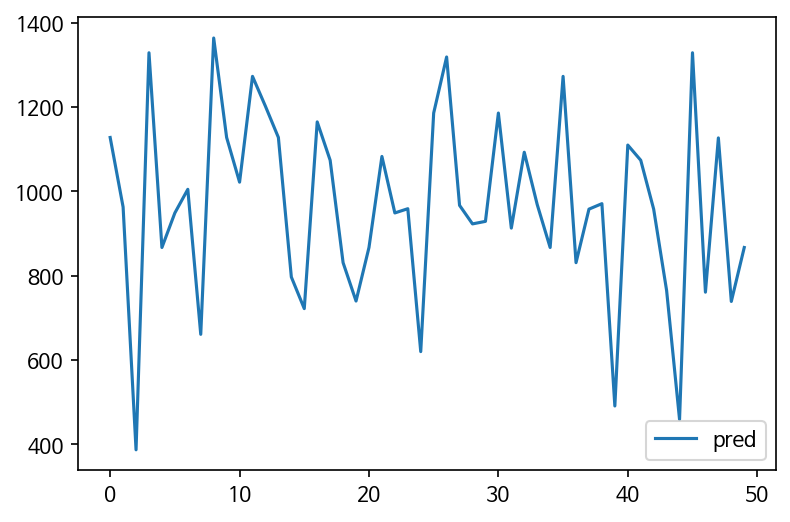

In [ ]:
X = train[features]
y = train['중식계']

lunch_model = DecisionTreeRegressor()

lunch_model.fit(X,y)

lunch_count_predict = lunch_model.predict(test[features])

plt.figure(dpi=150)

plt.plot(lunch_count_predict, label='pred')
plt.legend()
plt.show()

### 2) 석식계 예측 모델

In [ ]:
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
features.append('중식계')
features

['요일',
 '월',
 '일',
 '현재원',
 '본사휴가자수',
 '본사출장자수',
 '본사시간외근무명령서승인건수',
 '현본사소속재택근무자수',
 '중식계']

In [ ]:
test['중식계'] = lunch_count_predict
test[features]

요일  월   일     현재원  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수     중식계
0   3  1  27  2355.0      88     182               5        358.0  1128.0
1   4  1  28  2319.0     104     212             409        348.0   963.0
2   5  1  29  2170.0     270     249               0        294.0   387.0
3   1  2   1  2340.0     108     154             538        322.0  1329.0
4   2  2   2  2362.0      62     186             455        314.0   867.0
5   3  2   3  2380.0      59     199               5        286.0   949.0
6   4  2   4  2364.0      61     211             476        288.0  1005.0
7   5  2   5  2247.0     169     252               0        256.0   661.0
8   1  2   8  2333.0      88     174             690        329.0  1364.0
9   2  2   9  2318.0      94     183             542        329.0  1128.0
10  3  2  10  2068.0     489     134               0        233.0  1022.0
11  1  2  15  2260.0     178     131             795        355.0  1273.0
12  2  2  16  2266.0      70     175             815        413.0  1202.0
13  3  2  17  2287.0      77     181               3        379.0  1128.0
14  4  2  18  2256.0      83     247             594        338.0   797.0
15  5  2  19  2200.0     176     268               1        280.0   722.0
16  1  2  22  2375.0     105     197             814        247.0  1165.0
17  2  2  23  2416.0      75     200             783        233.0  1074.0
18  3  2  24  2378.0      77     235               3        234.0   831.0
19  4  2  25  2346.0      91     252             585        235.0   740.0
20  5  2  26  2205.0     261     279               1        179.0   867.0
21  2  3   2  2422.0     139     166             781        248.0  1083.0
22  3  3   3  2438.0      50     195               1        292.0   949.0
23  4  3   4  2404.0      72     236             746        263.0   959.0
24  5  3   5  2334.0     158     257               2        226.0   620.0
25  1  3   8  2444.0      97     170             939        264.0  1186.0
26  2  3   9  2447.0      76     170            1003        282.0  1319.0
27  3  3  10  2448.0      71     185               1        271.0   967.0
28  4  3  11  2398.0      93     223             609        261.0   923.0
29  5  3  12  2243.0     241     240               0        251.0   929.0
30  1  3  15  2387.0     126     148             864        314.0  1186.0
31  2  3  16  2324.0      74     176             658        401.0   913.0
32  3  3  17  2322.0      90     192               4        371.0  1093.0
33  4  3  18  2287.0     106     231             520        351.0   969.0
34  5  3  19  2201.0     253     255               0        266.0   867.0
35  1  3  22  2326.0     133     166             707        350.0  1273.0
36  2  3  23  2339.0      82     205             688        349.0   831.0
37  3  3  24  2340.0      87     234               0        314.0   958.0
38  4  3  25  2300.0     118     260             441        297.0   971.0
39  5  3  26  2169.0     311     266               0        229.0   491.0
40  1  3  29  2358.0     121     178             660        318.0  1110.0
41  2  3  30  2381.0      83     198             625        313.0  1074.0
42  3  3  31  2355.0      86     217               0        317.0   958.0
43  4  4   1  2326.0      88     256             394        303.0   765.0
44  5  4   2  2202.0     275     272               0        224.0   459.0
45  1  4   5  2343.0     125     174             704        331.0  1329.0
46  2  4   6  2363.0      76     170             636        364.0   761.0
47  3  4   7  2329.0      96     214               1        334.0  1127.0
48  4  4   8  2306.0     105     238             509        324.0   739.0
49  5  4   9  2217.0     259     268               0        229.0   867.0

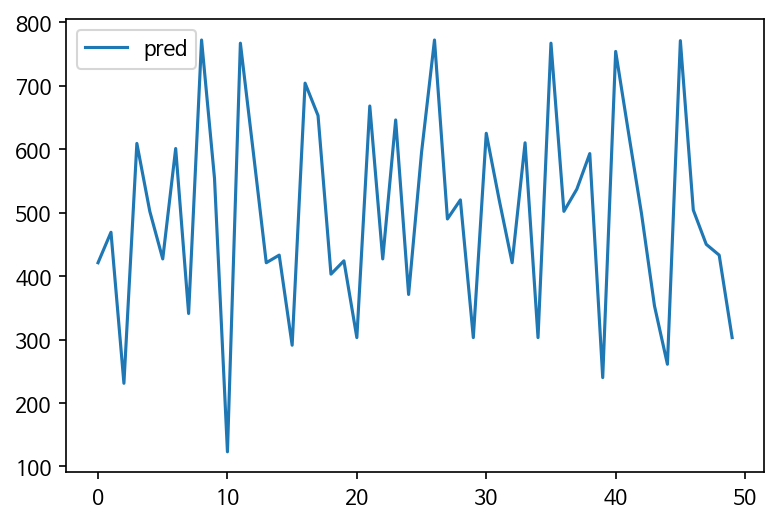

In [ ]:
X = train[features]
y = train['석식계']

dinner_model = DecisionTreeRegressor()

dinner_model.fit(X,y)

dinner_count_predict = dinner_model.predict(test[features])

plt.figure(dpi=150)

plt.plot(dinner_count_predict, label='pred')
plt.legend()
plt.show()

### 3) 제출

In [ ]:
# 아까 제출한 학생들은 제출 ㄴㄴ
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('submission.csv', index=False)

## 3.여러 모델 사용해보기 - 랜덤포레스트

### 1) 중식계 예측 모델

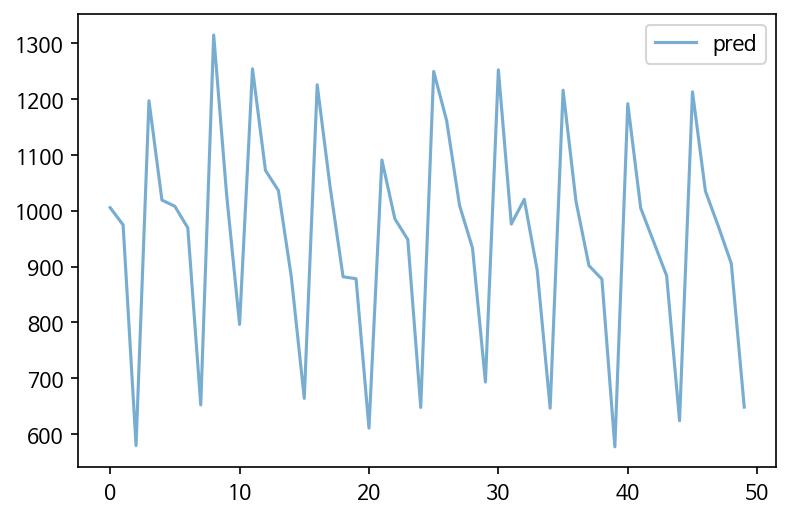

In [ ]:
features = features[:-1]

X = train[features]
y = train['중식계']

from sklearn.ensemble import RandomForestRegressor

# 1. 모델 정의
lunch_model = RandomForestRegressor()

# 2. 모델 학습
# fit() 메소드 이용
lunch_model.fit(X,y)

# 3. 예측
# predict() 메소드 이용
lunch_count_predict = lunch_model.predict(test[features])

plt.figure(dpi=150)
plt.plot(lunch_count_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

#### a) 랜덤포레스트 모델 시각화

In [ ]:
lunch_model.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1638899877),
 DecisionTreeRegressor(max_features='auto', random_state=254319890),
 DecisionTreeRegressor(max_features='auto', random_state=608995320),
 DecisionTreeRegressor(max_features='auto', random_state=1567963743),
 DecisionTreeRegressor(max_features='auto', random_state=835004438),
 DecisionTreeRegressor(max_features='auto', random_state=371402188),
 DecisionTreeRegressor(max_features='auto', random_state=258384675),
 DecisionTreeRegressor(max_features='auto', random_state=1535874871),
 DecisionTreeRegressor(max_features='auto', random_state=526201339),
 DecisionTreeRegressor(max_features='auto', random_state=284302977),
 DecisionTreeRegressor(max_features='auto', random_state=1872753357),
 DecisionTreeRegressor(max_features='auto', random_state=439856795),
 DecisionTreeRegressor(max_features='auto', random_state=1045095079),
 DecisionTreeRegressor(max_features='auto', random_state=1401976439),
 DecisionTreeRegressor(max_f

In [ ]:
from sklearn.tree import export_graphviz

estimator = lunch_model.estimators_[1]

#dot파일 생성
export_graphviz(estimator, out_file='tree.dot',
                max_depth = 3, 
                precision = 3, 
                filled = True, 
                rounded=True
               )

# png로 바꾸기
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

# png출력
from IPython.display import Image
Image(filename = 'decision-tree.png')

In [ ]:
from sklearn.tree import export_graphviz

estimator = lunch_model.estimators_[3]

#dot파일 생성
export_graphviz(estimator, out_file='tree.dot',
                max_depth = 3, 
                precision = 3, 
                filled = True, 
                rounded=True
               )

# png로 바꾸기
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

# png출력
from IPython.display import Image
Image(filename = 'decision-tree.png')

### 2) 석식계 예측 모델

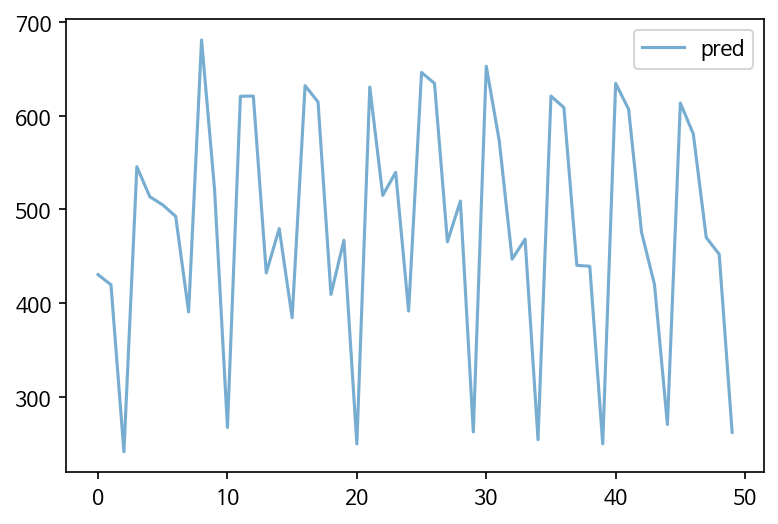

In [ ]:
features.append('중식계')

test['중식계'] = lunch_count_predict

X = train[features]
y = train['석식계']

dinner_model = RandomForestRegressor()

dinner_model.fit(X,y)

dinner_count_predict = dinner_model.predict(test[features])

plt.figure(dpi=150)
plt.plot(dinner_count_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

### 3) 제출

In [ ]:
# 이거는 다 제출 해보기

submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('submission.csv', index=False)

### 4) 결과

PPT

## 4.여러 모델 사용해보기 - 선형회귀

### 1) 중식계 예측 모델

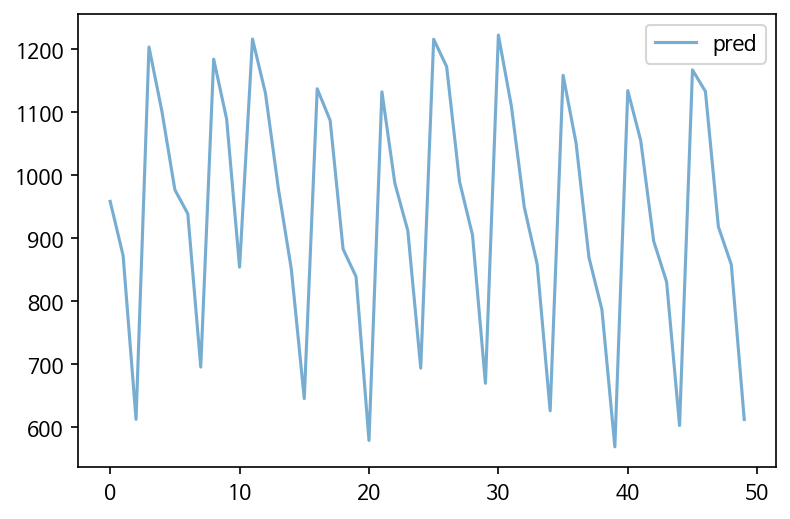

In [ ]:
features = features[:-1]

X = train[features]
y = train['중식계']

from sklearn.linear_model import LinearRegression

lunch_model = LinearRegression()

lunch_model.fit(X,y)

lunch_count_predict = lunch_model.predict(test[features])

plt.figure(dpi=150)
plt.plot(lunch_count_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

### 2) 석식계 예측 모델

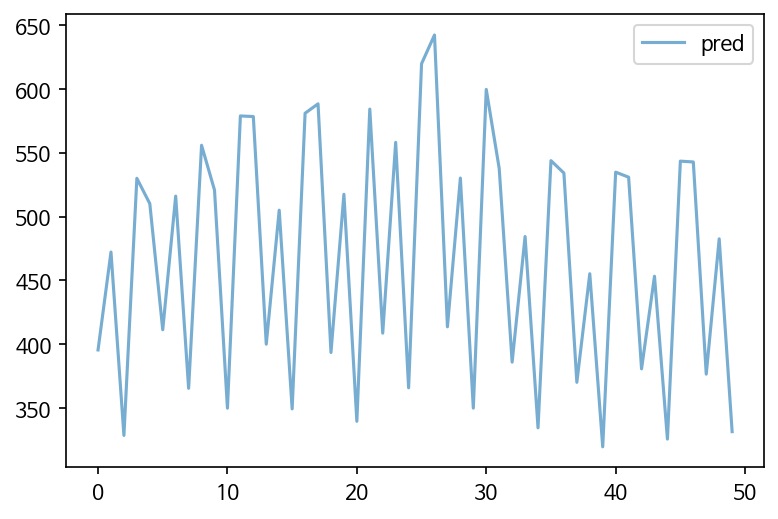

In [ ]:
features.append('중식계')

test['중식계'] = lunch_count_predict

X = train[features]
y = train['석식계']

dinner_model = LinearRegression()

dinner_model.fit(X,y)

dinner_count_predict = dinner_model.predict(test[features])

plt.figure(dpi=150)
plt.plot(dinner_count_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

## 5.하이퍼 파라미터 튜닝하기

### 1) 중식계 예측 모델

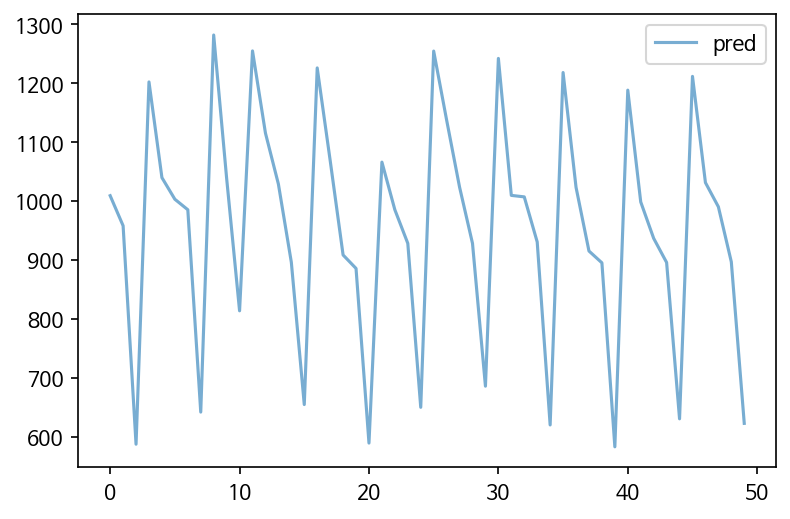

In [ ]:
features = features[:-1]

X = train[features]
y = train['중식계']

from sklearn.ensemble import RandomForestRegressor

lunch_model = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

lunch_model.fit(X,y)

lunch_count_predict = lunch_model.predict(test[features])

plt.figure(dpi=150)
plt.plot(lunch_count_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

### 2) 석식계 예측 모델

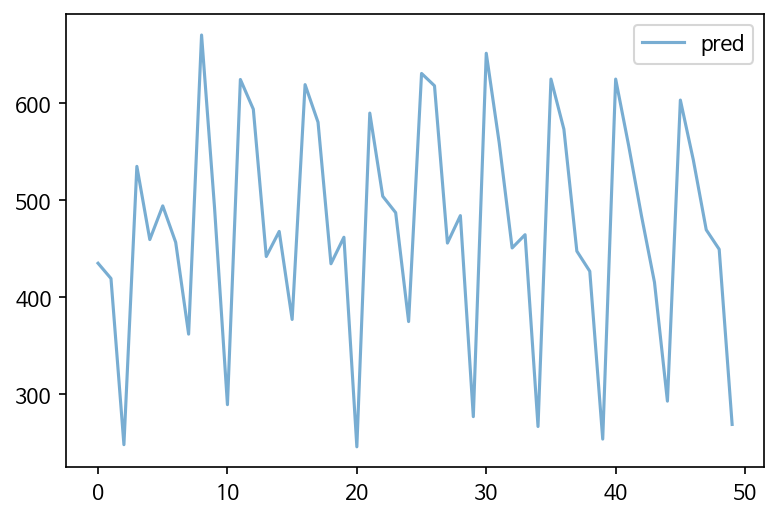

In [ ]:
features.append('중식계')

test['중식계'] = lunch_count_predict

X = train[features]
y = train['석식계']

dinner_model = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

dinner_model.fit(X,y)

dinner_count_predict = dinner_model.predict(test[features])

plt.figure(dpi=150)
plt.plot(dinner_count_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

### 3) 제출

In [ ]:
# 이거도 다 제출 해보기

submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('submission.csv', index=False)

## 6.텍스트 데이터 사용해보기

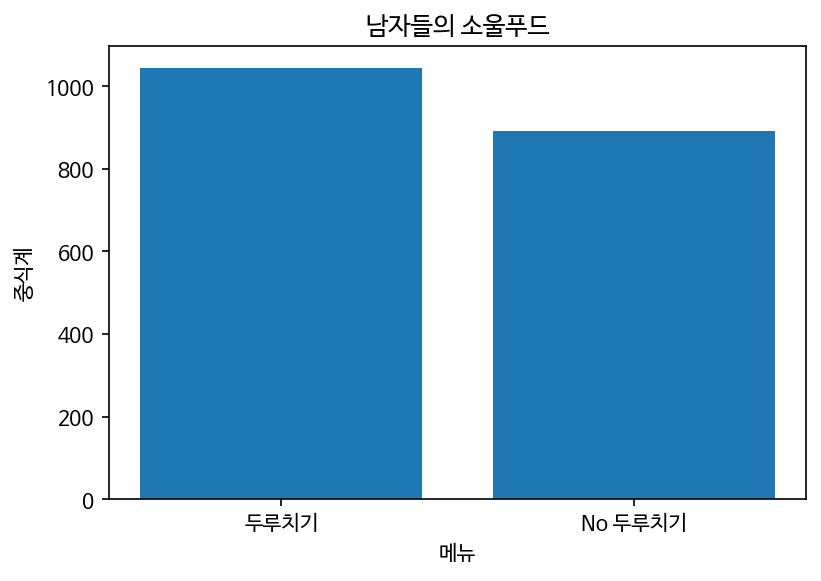

In [ ]:
def find_something(text:str):
  if '두루치기' in text:
    return True
  else:
    return False

x = ['두루치기', 'No 두루치기']
y =[train[train['중식메뉴'].map(find_something)]['중식계'].mean(),train[~train['중식메뉴'].map(find_something)]['중식계'].mean()]
plt.figure(dpi=150)
plt.title("남자들의 소울푸드")
plt.xlabel('메뉴')
plt.ylabel('중식계')
plt.bar(x, y)
plt.show()

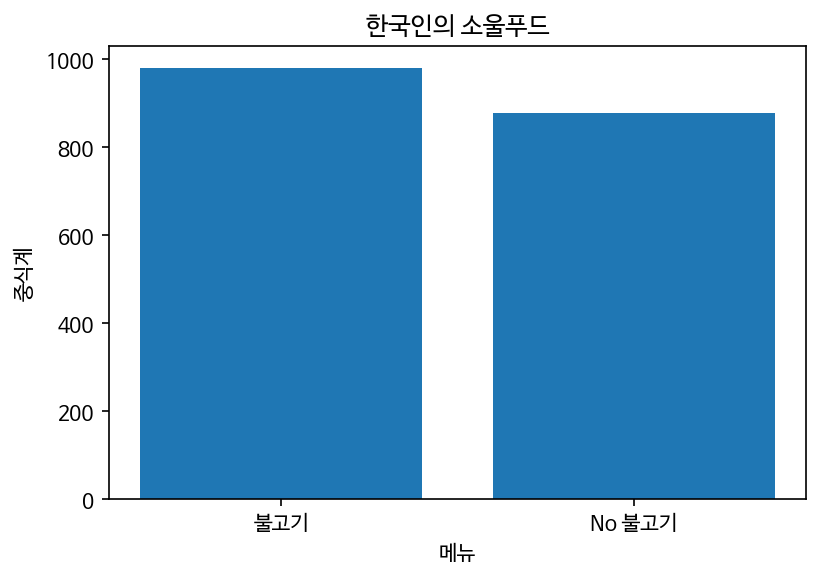

In [ ]:
def find_something(text:str):
  if '불고기' in text:
    return True
  else:
    return False

x = ['불고기', 'No 불고기']
y =[train[train['중식메뉴'].map(find_something)]['중식계'].mean(),train[~train['중식메뉴'].map(find_something)]['중식계'].mean()]
plt.figure(dpi=150)
plt.title("한국인의 소울푸드")
plt.xlabel('메뉴')
plt.ylabel('중식계')
plt.bar(x, y)
plt.show()

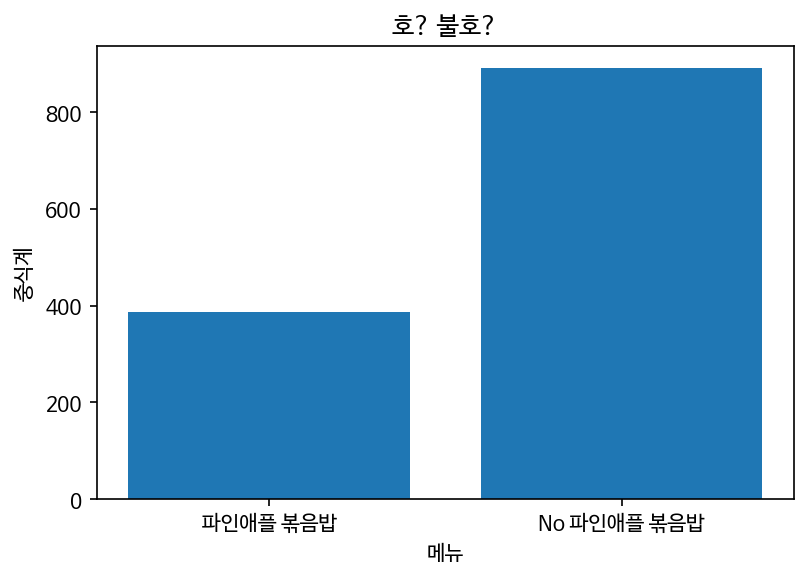

In [ ]:
def find_something(text:str):
  if '파인애플볶음밥' in text:
    return True
  else:
    return False

x = ['파인애플 볶음밥', 'No 파인애플 볶음밥']
y =[train[train['중식메뉴'].map(find_something)]['중식계'].mean(),train[~train['중식메뉴'].map(find_something)]['중식계'].mean()]
plt.figure(dpi=150)
plt.title("호? 불호?")
plt.xlabel('메뉴')
plt.ylabel('중식계')
plt.bar(x, y)
plt.show()

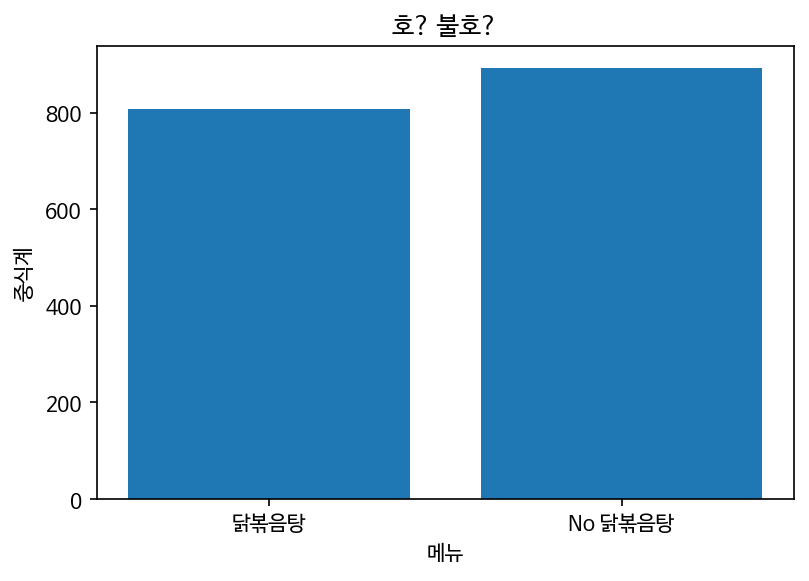

In [ ]:
def find_something(text:str):
  if '닭볶음탕' in text:
    return True
  else:
    return False

x = ['닭볶음탕', 'No 닭볶음탕']
y =[train[train['중식메뉴'].map(find_something)]['중식계'].mean(),train[~train['중식메뉴'].map(find_something)]['중식계'].mean()]
plt.figure(dpi=150)
plt.title("호? 불호?")
plt.xlabel('메뉴')
plt.ylabel('중식계')
plt.bar(x, y)
plt.show()